## Workplace setup

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
from sklearn.feature_extraction import text
from nltk.corpus import stopwords
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
import gensim.corpora as corpora
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
import numpy as np
from gensim.models import LdaModel, CoherenceModel
import gensim.corpora as corpora
import itertools
from collections import Counter
import datetime
from gensim import models
from gensim.models.nmf import Nmf
import bitermplus as btm

[nltk_data] Downloading package stopwords to C:\Users\Amy
[nltk_data]     Farrow\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


ModuleNotFoundError: No module named 'bitermplus'

In [2]:
import numpy as np

In [3]:
import datetime

In [4]:
import plotnine

ModuleNotFoundError: No module named 'plotnine'

## Load data collected by PSAW

In [ ]:
submissions_full = pd.read_csv('submissions_full.csv', encoding = "UTF-8")
comments_full = pd.read_csv('comments_full.csv', encoding = "UTF-8")

In [ ]:
submissions_full.head(10)

Unnamed: 0                author  created_utc      id  num_comments  score  \
0           0       PradaPrincess91   1622519891  npl5ro            31      1   
1           1        PopCultureNerd   1622517103  npkd6c            47      1   
2           2              etoni888   1622508163  nphog5             8      1   
3           3  InvestigationTeamA34   1622507848  nphkua            53      1   
4           4  LowerAlternative7564   1622501952  npfoyv             4      1   
5           5   UnemployableVeggie1   1622496158  npdq5k             0      1   
6           6        PopCultureNerd   1622485579  np9x8h            39      2   
7           7      RIntegralDomainR   1622481820  np8jl2             0      2   
8           8       Dizzy_Comb_7486   1622476921  np6rfl            43      0   
9           9              xaanthar   1622471167  np4m3v            89      9   

                                            selftext  \
0                                                NaN   
1                                                NaN   
2  **Extension Request** \n\nI had an issue while...   
3                                                NaN   
4  The whiny ones who argue and act immature.  Ne...   
5                                          [removed]   
6  Hey all,\n\nPBS just published this piece abou...   
7                                                NaN   
8  I've given up on caring about my rmp profile e...   
9  I just graded an assignment.\n\nOn paper.\n\nW...   

                                               title  total_awards_received  \
0  I just created a new course! Now we are one of...                    0.0   
1  The Native Scholar Who Wasn’t - More than a de...                    0.0   
2                                  Accidental Poetry                    0.0   
3       What percent of students do you think cheat?                    0.0   
4  I’ve never seen the kinds of students you talk...                    0.0   
5  I would honestly rather get raped or beaten up...                    0.0   
6  "Older adults are heading to college in pursui...                    0.0   
7  This is something you've been missing from bei...                    0.0   
8  Is there any way to not have my ratemyprofesso...                    0.0   
9                   I just did a very strange thing.                    0.0   

        created  
0  1.622534e+09  
1  1.622532e+09  
2  1.622523e+09  
3  1.622522e+09  
4  1.622516e+09  
5  1.622511e+09  
6  1.622500e+09  
7  1.622496e+09  
8  1.622491e+09  
9  1.622486e+09

In [ ]:
comments_full.head(10)

Unnamed: 0                author  \
0           0             starfries   
1           1             starfries   
2           2          Ulrich_Plays   
3           3          Ulrich_Plays   
4           4             starfries   
5           5  InvestigationTeamA34   
6           6     sourdoughobsessed   
7           7            urnbabyurn   
8           8             Eigengrad   
9           9  InvestigationTeamA34   

                                                body  created_utc       id  \
0  Legend has it there once were students who eve...   1622519978  h05nu21   
1  I thought grading was always done in pen so st...   1622519861  h05nnj1   
2  You didn't, BUT you equated it to less than th...   1622519840  h05nmae   
3  It isn't one of constant crying for help with ...   1622519761  h05nhtv   
4  I'm so thankful the administration here agrees...   1622519654  h05nbro   
5                   You don't live a life on Reddit?   1622519593  h05n8c8   
6  You don’t focus on academics though. You focus...   1622519529  h05n4n6   
7  That’s lazy analysis. What about American cult...   1622519525  h05n4ff   
8  Lol, you called someone a liar upthread when y...   1622519504  h05n399   
9  The issue is if I start to try to socialize or...   1622519453  h05n09q   

     link_id  score       created  
0  t3_np4m3v      2  1.622534e+09  
1  t3_np4m3v      6  1.622534e+09  
2  t3_nphkua      2  1.622534e+09  
3  t3_nphkua      3  1.622534e+09  
4  t3_np4m3v      3  1.622534e+09  
5  t3_nphkua      0  1.622534e+09  
6  t3_nphkua      5  1.622534e+09  
7  t3_no6beu      1  1.622534e+09  
8  t3_nphkua      2  1.622534e+09  
9  t3_nphkua      1  1.622534e+09

## Connect post and comment data

In [ ]:
submissions_full['text'] = submissions_full.title.astype(str) + " " + submissions_full.selftext.astype(str)
submissions_full.head(10)

Unnamed: 0                author  created_utc      id  num_comments  score  \
0           0       PradaPrincess91   1622519891  npl5ro            31      1   
1           1        PopCultureNerd   1622517103  npkd6c            47      1   
2           2              etoni888   1622508163  nphog5             8      1   
3           3  InvestigationTeamA34   1622507848  nphkua            53      1   
4           4  LowerAlternative7564   1622501952  npfoyv             4      1   
5           5   UnemployableVeggie1   1622496158  npdq5k             0      1   
6           6        PopCultureNerd   1622485579  np9x8h            39      2   
7           7      RIntegralDomainR   1622481820  np8jl2             0      2   
8           8       Dizzy_Comb_7486   1622476921  np6rfl            43      0   
9           9              xaanthar   1622471167  np4m3v            89      9   

                                            selftext  \
0                                                NaN   
1                                                NaN   
2  **Extension Request** \n\nI had an issue while...   
3                                                NaN   
4  The whiny ones who argue and act immature.  Ne...   
5                                          [removed]   
6  Hey all,\n\nPBS just published this piece abou...   
7                                                NaN   
8  I've given up on caring about my rmp profile e...   
9  I just graded an assignment.\n\nOn paper.\n\nW...   

                                               title  total_awards_received  \
0  I just created a new course! Now we are one of...                    0.0   
1  The Native Scholar Who Wasn’t - More than a de...                    0.0   
2                                  Accidental Poetry                    0.0   
3       What percent of students do you think cheat?                    0.0   
4  I’ve never seen the kinds of students you talk...                    0.0   
5  I would honestly rather get raped or beaten up...                    0.0   
6  "Older adults are heading to college in pursui...                    0.0   
7  This is something you've been missing from bei...                    0.0   
8  Is there any way to not have my ratemyprofesso...                    0.0   
9                   I just did a very strange thing.                    0.0   

        created                                               text  
0  1.622534e+09  I just created a new course! Now we are one of...  
1  1.622532e+09  The Native Scholar Who Wasn’t - More than a de...  
2  1.622523e+09  Accidental Poetry **Extension Request** \n\nI ...  
3  1.622522e+09   What percent of students do you think cheat? nan  
4  1.622516e+09  I’ve never seen the kinds of students you talk...  
5  1.622511e+09  I would honestly rather get raped or beaten up...  
6  1.622500e+09  "Older adults are heading to college in pursui...  
7  1.622496e+09  This is something you've been missing from bei...  
8  1.622491e+09  Is there any way to not have my ratemyprofesso...  
9  1.622486e+09  I just did a very strange thing. I just graded...

In [ ]:
submissions_full = submissions_full.drop(['Unnamed: 0', 'author', 'created_utc', 'num_comments', 'score', \
                                          'selftext', 'title', 'total_awards_received'], axis = 1)
submissions_full.head(10)

id       created                                               text
0  npl5ro  1.622534e+09  I just created a new course! Now we are one of...
1  npkd6c  1.622532e+09  The Native Scholar Who Wasn’t - More than a de...
2  nphog5  1.622523e+09  Accidental Poetry **Extension Request** \n\nI ...
3  nphkua  1.622522e+09   What percent of students do you think cheat? nan
4  npfoyv  1.622516e+09  I’ve never seen the kinds of students you talk...
5  npdq5k  1.622511e+09  I would honestly rather get raped or beaten up...
6  np9x8h  1.622500e+09  "Older adults are heading to college in pursui...
7  np8jl2  1.622496e+09  This is something you've been missing from bei...
8  np6rfl  1.622491e+09  Is there any way to not have my ratemyprofesso...
9  np4m3v  1.622486e+09  I just did a very strange thing. I just graded...

In [ ]:
comments_full['post_id'] = comments_full.link_id.str.slice(3, )
comments_full.head(10)

Unnamed: 0                author  \
0           0             starfries   
1           1             starfries   
2           2          Ulrich_Plays   
3           3          Ulrich_Plays   
4           4             starfries   
5           5  InvestigationTeamA34   
6           6     sourdoughobsessed   
7           7            urnbabyurn   
8           8             Eigengrad   
9           9  InvestigationTeamA34   

                                                body  created_utc       id  \
0  Legend has it there once were students who eve...   1622519978  h05nu21   
1  I thought grading was always done in pen so st...   1622519861  h05nnj1   
2  You didn't, BUT you equated it to less than th...   1622519840  h05nmae   
3  It isn't one of constant crying for help with ...   1622519761  h05nhtv   
4  I'm so thankful the administration here agrees...   1622519654  h05nbro   
5                   You don't live a life on Reddit?   1622519593  h05n8c8   
6  You don’t focus on academics though. You focus...   1622519529  h05n4n6   
7  That’s lazy analysis. What about American cult...   1622519525  h05n4ff   
8  Lol, you called someone a liar upthread when y...   1622519504  h05n399   
9  The issue is if I start to try to socialize or...   1622519453  h05n09q   

     link_id  score       created post_id  
0  t3_np4m3v      2  1.622534e+09  np4m3v  
1  t3_np4m3v      6  1.622534e+09  np4m3v  
2  t3_nphkua      2  1.622534e+09  nphkua  
3  t3_nphkua      3  1.622534e+09  nphkua  
4  t3_np4m3v      3  1.622534e+09  np4m3v  
5  t3_nphkua      0  1.622534e+09  nphkua  
6  t3_nphkua      5  1.622534e+09  nphkua  
7  t3_no6beu      1  1.622534e+09  no6beu  
8  t3_nphkua      2  1.622534e+09  nphkua  
9  t3_nphkua      1  1.622534e+09  nphkua

In [ ]:
comments_full = comments_full.drop(['Unnamed: 0', 'author', 'created_utc', 'id', \
                                    'link_id', 'score'], axis = 1)
comments_full.head(10)

body       created post_id
0  Legend has it there once were students who eve...  1.622534e+09  np4m3v
1  I thought grading was always done in pen so st...  1.622534e+09  np4m3v
2  You didn't, BUT you equated it to less than th...  1.622534e+09  nphkua
3  It isn't one of constant crying for help with ...  1.622534e+09  nphkua
4  I'm so thankful the administration here agrees...  1.622534e+09  np4m3v
5                   You don't live a life on Reddit?  1.622534e+09  nphkua
6  You don’t focus on academics though. You focus...  1.622534e+09  nphkua
7  That’s lazy analysis. What about American cult...  1.622534e+09  no6beu
8  Lol, you called someone a liar upthread when y...  1.622534e+09  nphkua
9  The issue is if I start to try to socialize or...  1.622534e+09  nphkua

## Link submissions and comment data

In [ ]:
def join_comment_submission(ID):
    return comments_full[comments_full.post_id == ID].body.str.cat(sep = " ")

In [ ]:
posts_full = submissions_full
posts_full['comments'] = posts_full.id.apply(join_comment_submission)
posts_full.head(10)

id       created                                               text  \
0  npl5ro  1.622534e+09  I just created a new course! Now we are one of...   
1  npkd6c  1.622532e+09  The Native Scholar Who Wasn’t - More than a de...   
2  nphog5  1.622523e+09  Accidental Poetry **Extension Request** \n\nI ...   
3  nphkua  1.622522e+09   What percent of students do you think cheat? nan   
4  npfoyv  1.622516e+09  I’ve never seen the kinds of students you talk...   
5  npdq5k  1.622511e+09  I would honestly rather get raped or beaten up...   
6  np9x8h  1.622500e+09  "Older adults are heading to college in pursui...   
7  np8jl2  1.622496e+09  This is something you've been missing from bei...   
8  np6rfl  1.622491e+09  Is there any way to not have my ratemyprofesso...   
9  np4m3v  1.622486e+09  I just did a very strange thing. I just graded...   

                                            comments  
0                                                     
1  I thought the article was referring to Elizabe...  
2  Both are direct pastes from student emails. Th...  
3  You didn't, BUT you equated it to less than th...  
4  [removed] Why do I suspect that this isn't in ...  
5                                                     
6  Why are you so cruel? The world needs baristas...  
7                                                     
8  You are giving RMP too much weight.  Just igno...  
9  Legend has it there once were students who eve...

In [ ]:
posts_full['full_text'] = posts_full.text.str.cat(posts_full.comments, sep = " ", na_rep = '')
posts_full.head(10)

id       created                                               text  \
0  npl5ro  1.622534e+09  I just created a new course! Now we are one of...   
1  npkd6c  1.622532e+09  The Native Scholar Who Wasn’t - More than a de...   
2  nphog5  1.622523e+09  Accidental Poetry **Extension Request** \n\nI ...   
3  nphkua  1.622522e+09   What percent of students do you think cheat? nan   
4  npfoyv  1.622516e+09  I’ve never seen the kinds of students you talk...   
5  npdq5k  1.622511e+09  I would honestly rather get raped or beaten up...   
6  np9x8h  1.622500e+09  "Older adults are heading to college in pursui...   
7  np8jl2  1.622496e+09  This is something you've been missing from bei...   
8  np6rfl  1.622491e+09  Is there any way to not have my ratemyprofesso...   
9  np4m3v  1.622486e+09  I just did a very strange thing. I just graded...   

                                            comments  \
0                                                      
1  I thought the article was referring to Elizabe...   
2  Both are direct pastes from student emails. Th...   
3  You didn't, BUT you equated it to less than th...   
4  [removed] Why do I suspect that this isn't in ...   
5                                                      
6  Why are you so cruel? The world needs baristas...   
7                                                      
8  You are giving RMP too much weight.  Just igno...   
9  Legend has it there once were students who eve...   

                                           full_text  
0  I just created a new course! Now we are one of...  
1  The Native Scholar Who Wasn’t - More than a de...  
2  Accidental Poetry **Extension Request** \n\nI ...  
3  What percent of students do you think cheat? n...  
4  I’ve never seen the kinds of students you talk...  
5  I would honestly rather get raped or beaten up...  
6  "Older adults are heading to college in pursui...  
7  This is something you've been missing from bei...  
8  Is there any way to not have my ratemyprofesso...  
9  I just did a very strange thing. I just graded...

In [ ]:
posts_full = posts_full.drop(['id', 'text', 'comments'], axis = 1)
posts_full.head(10)

created                                          full_text
0  1.622534e+09  I just created a new course! Now we are one of...
1  1.622532e+09  The Native Scholar Who Wasn’t - More than a de...
2  1.622523e+09  Accidental Poetry **Extension Request** \n\nI ...
3  1.622522e+09  What percent of students do you think cheat? n...
4  1.622516e+09  I’ve never seen the kinds of students you talk...
5  1.622511e+09  I would honestly rather get raped or beaten up...
6  1.622500e+09  "Older adults are heading to college in pursui...
7  1.622496e+09  This is something you've been missing from bei...
8  1.622491e+09  Is there any way to not have my ratemyprofesso...
9  1.622486e+09  I just did a very strange thing. I just graded...

In [ ]:
posts_full.head(50)

created                                          full_text
0   1.622534e+09  i just created a new course now we are one of ...
1   1.622532e+09  the native scholar who wasn t more than a deca...
2   1.622523e+09  accidental poetry extension request i had an i...
3   1.622522e+09  what percent of students do you think cheat na...
4   1.622516e+09  i ve never seen the kinds of students you talk...
5   1.622511e+09  i would honestly rather get raped or beaten up...
6   1.622500e+09   older adults are heading to college in pursui...
7   1.622496e+09  this is something you ve been missing from bei...
8   1.622491e+09  is there any way to not have my ratemyprofesso...
9   1.622486e+09  i just did a very strange thing i just graded ...
10  1.622477e+09  what are some game changing items that you hav...
11  1.622454e+09                             academic aita deleted 
12  1.622450e+09  students completing assignments on their phone...
13  1.622445e+09  vent time i get it you resent that you have to...
14  1.622439e+09  syllabus with no letter grade assignment is c ...
15  1.622438e+09  will a low student to faculty ratio lt provide...
16  1.622438e+09  when making a decision about where to attend u...
17  1.622437e+09  how is a c my kid just finished his third seme...
18  1.622435e+09   small success sunday weekly thread welcome to...
19  1.622427e+09  united states adjuncts or lecturers that have ...
20  1.622424e+09  whatsapp and discord illegal group collaborati...
21  1.622423e+09  whatsapp and discord cheating to start i am a ...
22  1.622422e+09  providing solutions for the exams i sent a stu...
23  1.622421e+09               for those who could use a laugh nan 
24  1.622421e+09          the types of reviewers you will meet nan 
25  1.622421e+09  missing the first few classes don t we all lov...
26  1.622413e+09  expectations vs reality about problem solving ...
27  1.622400e+09                  slow internet connection removed 
28  1.622393e+09  so military secrets are showing up on chegg an...
29  1.622376e+09  advice for responding to poor student eval sta...
30  1.622368e+09  i am a former student wanting to ask my profes...
31  1.622364e+09  just venting about trivial things i am just co...
32  1.622363e+09         transfer being poached by phd program nan 
33  1.622355e+09  in an unprecedented move astronomer geoff marc...
34  1.622353e+09  plagiarism chegg hello i d like to ask a quest...
35  1.622351e+09  ok i found this pretty funny as someone who do...
36  1.622349e+09  student obsessed with grades ranking i feel li...
37  1.622346e+09  how do you stop getting the urge to look onlin...
38  1.622345e+09  how do you stop getting the urge to look onlin...
39  1.622342e+09  got this tattoo that i feel captures how i oft...
40  1.622335e+09  creating tournament brackets for courses like ...
41  1.622331e+09  re end of semester grading strategy nan well t...
42  1.622328e+09  end of semester thelma and louise style well i...
43  1.622325e+09  taxonomy question easy one here perhaps can a ...
44  1.622323e+09  do you allow students to text you i have some ...
45  1.622318e+09  discussion on blog post i want to quit my job ...
46  1.622307e+09  pedagogy resources i have very few responsibil...
47  1.622304e+09  end of the semester grading strategy nan the a...
48  1.622304e+09  open book note testing is this becoming more c...
49  1.622300e+09  college professors of reddit do you ever read ...

In [ ]:
posts_full.to_csv('posts_full.csv')

## Clean text

In [ ]:
posts_clean = posts_full
posts_clean.full_text = posts_clean.full_text.replace('[removed]', " ")
posts_clean.full_text = posts_clean.full_text.replace('[deleted]', " ")
posts_clean.full_text = posts_clean.full_text.replace('\n', " ")
posts_clean.full_text = posts_clean.full_text.replace("[^a-zA-Z]+", " ", regex = True)
posts_clean.full_text = posts_clean.full_text.str.lower()
posts_clean.head(10)

created                                          full_text
0  1.622534e+09  i just created a new course now we are one of ...
1  1.622532e+09  the native scholar who wasn t more than a deca...
2  1.622523e+09  accidental poetry extension request i had an i...
3  1.622522e+09  what percent of students do you think cheat na...
4  1.622516e+09  i ve never seen the kinds of students you talk...
5  1.622511e+09  i would honestly rather get raped or beaten up...
6  1.622500e+09   older adults are heading to college in pursui...
7  1.622496e+09  this is something you ve been missing from bei...
8  1.622491e+09  is there any way to not have my ratemyprofesso...
9  1.622486e+09  i just did a very strange thing i just graded ...

In [ ]:
posts_clean.to_csv('posts_clean.csv')

## Lemmatization and stopword removal

In [ ]:
def get_lemma(word_tags):
    wordnet_lemmatizer = WordNetLemmatizer()
    lemma = []
    for element in word_tags:
        word = element[0][0]
        pos = element[0][1]
        tag = nltk.pos_tag([word])[0][1][0].upper()
        tag_dict = {"J": wordnet.ADJ,
                   "N": wordnet.NOUN,
                   "V": wordnet.VERB,
                   "R": wordnet.ADV}
        wordnet_pos = tag_dict.get(tag, wordnet.NOUN)
        lemma.append(wordnet_lemmatizer.lemmatize(word, wordnet_pos))
    return(lemma)

In [9]:
stop = ["professor", "student", "college", "https", "com", "www", "amp", "reddit", "comment", "link", "don", "nan", "http"]
stop_words_agg = stopwords.words('english')+ stop

In [ ]:
stop_words_agg

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
posts_clean["tokens"] = posts_clean.full_text.apply(word_tokenize)
posts_clean.head(10)

created                                          full_text  \
0  1.622534e+09  i just created a new course now we are one of ...   
1  1.622532e+09  the native scholar who wasn t more than a deca...   
2  1.622523e+09  accidental poetry extension request i had an i...   
3  1.622522e+09  what percent of students do you think cheat na...   
4  1.622516e+09  i ve never seen the kinds of students you talk...   
5  1.622511e+09  i would honestly rather get raped or beaten up...   
6  1.622500e+09   older adults are heading to college in pursui...   
7  1.622496e+09  this is something you ve been missing from bei...   
8  1.622491e+09  is there any way to not have my ratemyprofesso...   
9  1.622486e+09  i just did a very strange thing i just graded ...   

                                              tokens  \
0  [i, just, created, a, new, course, now, we, ar...   
1  [the, native, scholar, who, wasn, t, more, tha...   
2  [accidental, poetry, extension, request, i, ha...   
3  [what, percent, of, students, do, you, think, ...   
4  [i, ve, never, seen, the, kinds, of, students,...   
5  [i, would, honestly, rather, get, raped, or, b...   
6  [older, adults, are, heading, to, college, in,...   
7  [this, is, something, you, ve, been, missing, ...   
8  [is, there, any, way, to, not, have, my, ratem...   
9  [i, just, did, a, very, strange, thing, i, jus...   

                                       tokens_nostop  
0  [created, new, course, one, social, work, prog...  
1  [native, scholar, decade, ago, prominent, acad...  
2  [accidental, poetry, extension, request, issue...  
3  [percent, students, think, cheat, nan, equated...  
4  [never, seen, kinds, students, talk, whiny, on...  
5  [would, honestly, rather, get, raped, beaten, ...  
6  [older, adults, heading, pursuit, new, opportu...  
7  [something, missing, f, f, come, know, missed,...  
8  [way, ratemyprofessors, profile, show, google,...  
9  [strange, thing, graded, assignment, paper, pe...

In [ ]:
def remove_stopwords(tokens):
    words = []
    for token in tokens:
        if len(token) > 1:
            if token not in stop_words_agg:
                words.append(token)
    return words

In [ ]:
posts_clean["tokens_nostop"] = posts_clean.tokens.apply(remove_stopwords)
posts_clean.head(10)

created                                          full_text  \
0  1.622534e+09  i just created a new course now we are one of ...   
1  1.622532e+09  the native scholar who wasn t more than a deca...   
2  1.622523e+09  accidental poetry extension request i had an i...   
3  1.622522e+09  what percent of students do you think cheat na...   
4  1.622516e+09  i ve never seen the kinds of students you talk...   
5  1.622511e+09  i would honestly rather get raped or beaten up...   
6  1.622500e+09   older adults are heading to college in pursui...   
7  1.622496e+09  this is something you ve been missing from bei...   
8  1.622491e+09  is there any way to not have my ratemyprofesso...   
9  1.622486e+09  i just did a very strange thing i just graded ...   

                                              tokens  \
0  [i, just, created, a, new, course, now, we, ar...   
1  [the, native, scholar, who, wasn, t, more, tha...   
2  [accidental, poetry, extension, request, i, ha...   
3  [what, percent, of, students, do, you, think, ...   
4  [i, ve, never, seen, the, kinds, of, students,...   
5  [i, would, honestly, rather, get, raped, or, b...   
6  [older, adults, are, heading, to, college, in,...   
7  [this, is, something, you, ve, been, missing, ...   
8  [is, there, any, way, to, not, have, my, ratem...   
9  [i, just, did, a, very, strange, thing, i, jus...   

                                       tokens_nostop  
0  [created, new, course, one, social, work, prog...  
1  [native, scholar, decade, ago, prominent, acad...  
2  [accidental, poetry, extension, request, issue...  
3  [percent, students, think, cheat, equated, les...  
4  [never, seen, kinds, students, talk, whiny, on...  
5  [would, honestly, rather, get, raped, beaten, ...  
6  [older, adults, heading, pursuit, new, opportu...  
7           [something, missing, come, know, missed]  
8  [way, ratemyprofessors, profile, show, google,...  
9  [strange, thing, graded, assignment, paper, pe...

In [ ]:
def lemmatize(tokens, allowed_postags=['NN', 'JJ', 'VBG', 'RB', 'JJR', 'JJS', 'RBR', 'RBS', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ']):
    wordnet_lemmatizer = WordNetLemmatizer()
    tokens_out = []
    for token in tokens:
        lemma = wordnet_lemmatizer.lemmatize(token)
        if nltk.pos_tag([lemma])[0][1] in allowed_postags:
            tokens_out.append(lemma)
    return tokens_out

In [ ]:
posts_clean["lemmatized"] = posts_clean.tokens_nostop.apply(lemmatize)

In [ ]:
posts_clean.head(10)

created                                          full_text  \
0  1.622534e+09  i just created a new course now we are one of ...   
1  1.622532e+09  the native scholar who wasn t more than a deca...   
2  1.622523e+09  accidental poetry extension request i had an i...   
3  1.622522e+09  what percent of students do you think cheat na...   
4  1.622516e+09  i ve never seen the kinds of students you talk...   
5  1.622511e+09  i would honestly rather get raped or beaten up...   
6  1.622500e+09   older adults are heading to college in pursui...   
7  1.622496e+09  this is something you ve been missing from bei...   
8  1.622491e+09  is there any way to not have my ratemyprofesso...   
9  1.622486e+09  i just did a very strange thing i just graded ...   

                                              tokens  \
0  [i, just, created, a, new, course, now, we, ar...   
1  [the, native, scholar, who, wasn, t, more, tha...   
2  [accidental, poetry, extension, request, i, ha...   
3  [what, percent, of, students, do, you, think, ...   
4  [i, ve, never, seen, the, kinds, of, students,...   
5  [i, would, honestly, rather, get, raped, or, b...   
6  [older, adults, are, heading, to, college, in,...   
7  [this, is, something, you, ve, been, missing, ...   
8  [is, there, any, way, to, not, have, my, ratem...   
9  [i, just, did, a, very, strange, thing, i, jus...   

                                       tokens_nostop  \
0  [created, new, course, one, social, work, prog...   
1  [native, scholar, decade, ago, prominent, acad...   
2  [accidental, poetry, extension, request, issue...   
3  [percent, students, think, cheat, equated, les...   
4  [never, seen, kinds, students, talk, whiny, on...   
5  [would, honestly, rather, get, raped, beaten, ...   
6  [older, adults, heading, pursuit, new, opportu...   
7           [something, missing, come, know, missed]   
8  [way, ratemyprofessors, profile, show, google,...   
9  [strange, thing, graded, assignment, paper, pe...   

                                          lemmatized  
0  [created, new, course, social, work, program, ...  
1  [native, scholar, decade, ago, prominent, acad...  
2  [accidental, poetry, extension, request, issue...  
3  [percent, student, think, cheat, equated, le, ...  
4  [never, seen, kind, student, talk, whiny, argu...  
5  [honestly, rather, raped, beaten, rather, suff...  
6  [older, adult, heading, pursuit, new, opportun...  
7                       [something, missing, missed]  
8  [way, profile, show, google, search, name, giv...  
9  [strange, thing, graded, assignment, paper, ru...

In [ ]:
posts_clean["lemmatized_text"] = posts_clean.lemmatized.apply(' '.join)
posts_clean.head(10)

created                                          full_text  \
0  1.622534e+09  i just created a new course now we are one of ...   
1  1.622532e+09  the native scholar who wasn t more than a deca...   
2  1.622523e+09  accidental poetry extension request i had an i...   
3  1.622522e+09  what percent of students do you think cheat na...   
4  1.622516e+09  i ve never seen the kinds of students you talk...   
5  1.622511e+09  i would honestly rather get raped or beaten up...   
6  1.622500e+09   older adults are heading to college in pursui...   
7  1.622496e+09  this is something you ve been missing from bei...   
8  1.622491e+09  is there any way to not have my ratemyprofesso...   
9  1.622486e+09  i just did a very strange thing i just graded ...   

                                              tokens  \
0  [i, just, created, a, new, course, now, we, ar...   
1  [the, native, scholar, who, wasn, t, more, tha...   
2  [accidental, poetry, extension, request, i, ha...   
3  [what, percent, of, students, do, you, think, ...   
4  [i, ve, never, seen, the, kinds, of, students,...   
5  [i, would, honestly, rather, get, raped, or, b...   
6  [older, adults, are, heading, to, college, in,...   
7  [this, is, something, you, ve, been, missing, ...   
8  [is, there, any, way, to, not, have, my, ratem...   
9  [i, just, did, a, very, strange, thing, i, jus...   

                                       tokens_nostop  \
0  [created, new, course, one, social, work, prog...   
1  [native, scholar, decade, ago, prominent, acad...   
2  [accidental, poetry, extension, request, issue...   
3  [percent, students, think, cheat, equated, les...   
4  [never, seen, kinds, students, talk, whiny, on...   
5  [would, honestly, rather, get, raped, beaten, ...   
6  [older, adults, heading, pursuit, new, opportu...   
7           [something, missing, come, know, missed]   
8  [way, ratemyprofessors, profile, show, google,...   
9  [strange, thing, graded, assignment, paper, pe...   

                                          lemmatized  \
0  [created, new, course, social, work, program, ...   
1  [native, scholar, decade, ago, prominent, acad...   
2  [accidental, poetry, extension, request, issue...   
3  [percent, student, think, cheat, equated, le, ...   
4  [never, seen, kind, student, talk, whiny, argu...   
5  [honestly, rather, raped, beaten, rather, suff...   
6  [older, adult, heading, pursuit, new, opportun...   
7                       [something, missing, missed]   
8  [way, profile, show, google, search, name, giv...   
9  [strange, thing, graded, assignment, paper, ru...   

                                     lemmatized_text  
0  created new course social work program offer d...  
1  native scholar decade ago prominent academic e...  
2  accidental poetry extension request issue edit...  
3  percent student think cheat equated le torture...  
4  never seen kind student talk whiny argue act i...  
5  honestly rather raped beaten rather suffer rem...  
6  older adult heading pursuit new opportunity si...  
7                           something missing missed  
8  way profile show google search name given cari...  
9  strange thing graded assignment paper rumor an...

In [ ]:
posts_clean.to_csv('posts_clean_.csv')

In [5]:
posts_clean = pd.read_csv('posts_clean_.csv', encoding = "UTF-8")

In [6]:
posts_clean.head(10)

Unnamed: 0       created  \
0           0  1.622534e+09   
1           1  1.622532e+09   
2           2  1.622523e+09   
3           3  1.622522e+09   
4           4  1.622516e+09   
5           5  1.622511e+09   
6           6  1.622500e+09   
7           7  1.622496e+09   
8           8  1.622491e+09   
9           9  1.622486e+09   

                                           full_text  \
0  i just created a new course now we are one of ...   
1  the native scholar who wasn t more than a deca...   
2  accidental poetry extension request i had an i...   
3  what percent of students do you think cheat na...   
4  i ve never seen the kinds of students you talk...   
5  i would honestly rather get raped or beaten up...   
6   older adults are heading to college in pursui...   
7  this is something you ve been missing from bei...   
8  is there any way to not have my ratemyprofesso...   
9  i just did a very strange thing i just graded ...   

                                              tokens  \
0  ['i', 'just', 'created', 'a', 'new', 'course',...   
1  ['the', 'native', 'scholar', 'who', 'wasn', 't...   
2  ['accidental', 'poetry', 'extension', 'request...   
3  ['what', 'percent', 'of', 'students', 'do', 'y...   
4  ['i', 've', 'never', 'seen', 'the', 'kinds', '...   
5  ['i', 'would', 'honestly', 'rather', 'get', 'r...   
6  ['older', 'adults', 'are', 'heading', 'to', 'c...   
7  ['this', 'is', 'something', 'you', 've', 'been...   
8  ['is', 'there', 'any', 'way', 'to', 'not', 'ha...   
9  ['i', 'just', 'did', 'a', 'very', 'strange', '...   

                                       tokens_nostop  \
0  ['created', 'new', 'course', 'one', 'social', ...   
1  ['native', 'scholar', 'decade', 'ago', 'promin...   
2  ['accidental', 'poetry', 'extension', 'request...   
3  ['percent', 'students', 'think', 'cheat', 'equ...   
4  ['never', 'seen', 'kinds', 'students', 'talk',...   
5  ['would', 'honestly', 'rather', 'get', 'raped'...   
6  ['older', 'adults', 'heading', 'pursuit', 'new...   
7  ['something', 'missing', 'come', 'know', 'miss...   
8  ['way', 'ratemyprofessors', 'profile', 'show',...   
9  ['strange', 'thing', 'graded', 'assignment', '...   

                                          lemmatized  \
0  ['created', 'new', 'course', 'social', 'work',...   
1  ['native', 'scholar', 'decade', 'ago', 'promin...   
2  ['accidental', 'poetry', 'extension', 'request...   
3  ['percent', 'student', 'think', 'cheat', 'equa...   
4  ['never', 'seen', 'kind', 'student', 'talk', '...   
5  ['honestly', 'rather', 'raped', 'beaten', 'rat...   
6  ['older', 'adult', 'heading', 'pursuit', 'new'...   
7                 ['something', 'missing', 'missed']   
8  ['way', 'profile', 'show', 'google', 'search',...   
9  ['strange', 'thing', 'graded', 'assignment', '...   

                                     lemmatized_text  
0  created new course social work program offer d...  
1  native scholar decade ago prominent academic e...  
2  accidental poetry extension request issue edit...  
3  percent student think cheat equated le torture...  
4  never seen kind student talk whiny argue act i...  
5  honestly rather raped beaten rather suffer rem...  
6  older adult heading pursuit new opportunity si...  
7                           something missing missed  
8  way profile show google search name given cari...  
9  strange thing graded assignment paper rumor an...

In [7]:
posts_clean.lemmatized = posts_clean.lemmatized_text.astype(str).apply(lambda x: x.split(' '))
posts_clean = posts_clean.drop(['Unnamed: 0', 'tokens', 'tokens_nostop'], axis=1)
posts_clean.head(10)

created                                          full_text  \
0  1.622534e+09  i just created a new course now we are one of ...   
1  1.622532e+09  the native scholar who wasn t more than a deca...   
2  1.622523e+09  accidental poetry extension request i had an i...   
3  1.622522e+09  what percent of students do you think cheat na...   
4  1.622516e+09  i ve never seen the kinds of students you talk...   
5  1.622511e+09  i would honestly rather get raped or beaten up...   
6  1.622500e+09   older adults are heading to college in pursui...   
7  1.622496e+09  this is something you ve been missing from bei...   
8  1.622491e+09  is there any way to not have my ratemyprofesso...   
9  1.622486e+09  i just did a very strange thing i just graded ...   

                                          lemmatized  \
0  [created, new, course, social, work, program, ...   
1  [native, scholar, decade, ago, prominent, acad...   
2  [accidental, poetry, extension, request, issue...   
3  [percent, student, think, cheat, equated, le, ...   
4  [never, seen, kind, student, talk, whiny, argu...   
5  [honestly, rather, raped, beaten, rather, suff...   
6  [older, adult, heading, pursuit, new, opportun...   
7                       [something, missing, missed]   
8  [way, profile, show, google, search, name, giv...   
9  [strange, thing, graded, assignment, paper, ru...   

                                     lemmatized_text  
0  created new course social work program offer d...  
1  native scholar decade ago prominent academic e...  
2  accidental poetry extension request issue edit...  
3  percent student think cheat equated le torture...  
4  never seen kind student talk whiny argue act i...  
5  honestly rather raped beaten rather suffer rem...  
6  older adult heading pursuit new opportunity si...  
7                           something missing missed  
8  way profile show google search name given cari...  
9  strange thing graded assignment paper rumor an...

# EDA

In [ ]:
counts = posts_clean["word_count"] = posts_clean.full_text.astype(str).apply(lambda x: x.split(' ')).apply(len)

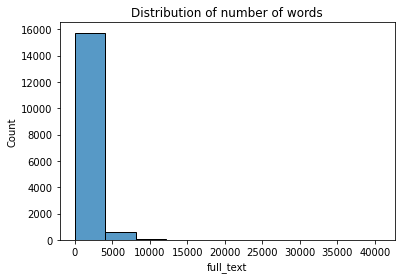

In [ ]:
sns.histplot(data= counts, bins= 10)
plt.title('Distribution of number of words')

plt.show()

In [ ]:
all_text = ' '.join(posts_clean.lemmatized_text.astype(str).tolist())

In [ ]:
all_words = all_text.split(sep = " ")

In [ ]:
top_20 = pd.DataFrame(Counter(all_words).most_common(20), columns=['word', 'frequency'])

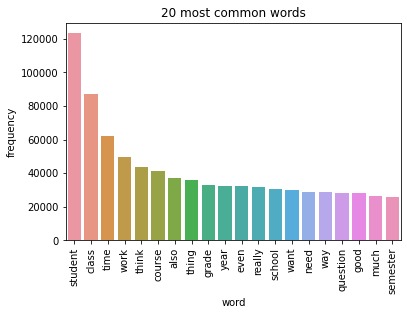

In [ ]:
sns.barplot(x='word', y='frequency', data=top_20)
plt.xticks(rotation=90)
plt.title('20 most common words')

plt.show()

In [ ]:
posts_clean['day'] = posts_clean.created.apply(datetime.datetime.fromtimestamp).dt.strftime('%Y-%m-%d')

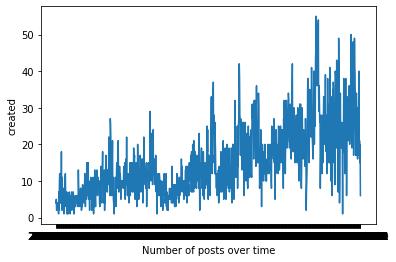

In [ ]:
plot = sns.lineplot(x = 'day',
             y = 'created',
             data = posts_clean.groupby(["day"]).count())
plot.set(xlabel = 'Number of posts over time')
plt.show(plot)

## TFIDF matrix

In [10]:
vectorizer = TfidfVectorizer(stop_words = stop_words_agg, 
                             ngram_range = (1,1), 
                             max_df = 0.8, 
                             min_df = 0.1)

In [11]:
data_vectorizer = vectorizer.fit_transform(posts_clean.lemmatized_text.fillna(' '))

In [12]:
data_vectorized = pd.DataFrame(data_vectorizer.toarray(), columns = vectorizer.get_feature_names())

data_vectorized.index = posts_clean.index

data_vectorized.head(10)

ability      able  absolutely  academia  academic  access  activity  \
0      0.0  0.000000    0.000000       0.0  0.000000     0.0       0.0   
1      0.0  0.000000    0.000000       0.0  0.234018     0.0       0.0   
2      0.0  0.000000    0.000000       0.0  0.000000     0.0       0.0   
3      0.0  0.000000    0.000000       0.0  0.160688     0.0       0.0   
4      0.0  0.000000    0.000000       0.0  0.000000     0.0       0.0   
5      0.0  0.000000    0.000000       0.0  0.000000     0.0       0.0   
6      0.0  0.000000    0.056684       0.0  0.000000     0.0       0.0   
7      0.0  0.000000    0.000000       0.0  0.000000     0.0       0.0   
8      0.0  0.052033    0.031349       0.0  0.027300     0.0       0.0   
9      0.0  0.000000    0.000000       0.0  0.000000     0.0       0.0   

     actual  actually   address  ...     write   writing   written     wrong  \
0  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
1  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
2  0.000000  0.076973  0.000000  ...  0.000000  0.097595  0.117008  0.000000   
3  0.049706  0.065360  0.000000  ...  0.000000  0.041436  0.000000  0.000000   
4  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
5  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
6  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.051959   
7  0.000000  0.000000  0.000000  ...  0.000000  0.000000  0.000000  0.000000   
8  0.000000  0.044418  0.000000  ...  0.110642  0.000000  0.000000  0.000000   
9  0.037582  0.049418  0.042048  ...  0.000000  0.031329  0.037561  0.127884   

      wrote      yeah      year       yet      zero      zoom  
0  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
2  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
3  0.000000  0.040840  0.028716  0.044015  0.052718  0.000000  
4  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
5  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
6  0.000000  0.000000  0.035287  0.000000  0.000000  0.000000  
7  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  
8  0.144899  0.000000  0.195154  0.000000  0.000000  0.000000  
9  0.040303  0.030879  0.043425  0.000000  0.079719  0.039388  

[10 rows x 539 columns]

# LDA

## Figuring out the optimal number of topics

In [9]:
data_words = posts_clean.lemmatized.tolist()
data_words = list(data_words)

In [10]:
id2word = corpora.Dictionary(data_words)

In [11]:
corpus = [id2word.doc2bow(text) for text in data_words]

In [12]:
num_topics = list(np.arange(2, 20 + 1, 1))

In [13]:
LDA_models = {}
for num in range(0, len(num_topics)):
    LDA_models[num] = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics[num])

In [14]:
LDA_topics = {}
for num in range(0, len(num_topics)):
    LDA_topics[num] = LDA_models[num].print_topics()

In [15]:
from IPython.display import Audio

In [22]:
LDA_coherence_scores = {}
for num in range(0, len(num_topics)):
    LDA_coherence_scores[num] = [CoherenceModel(model=LDA_models[num],
                         texts=data_words,
                         dictionary=id2word,
                         coherence='c_v').get_coherence()\
                for i in num_topics[:-1]]

Audio("http://www.nch.com.au/acm/8k16bitpcm.wav", autoplay = True) #telle me when the code is done - ~14 hours

In [23]:
LDA_coherence_scores_av = [np.array(list).mean() for list in [scores for scores in LDA_coherence_scores.values()]]

In [24]:
def jaccard_similarity(topic_1, topic_2):
    """
    Derives the Jaccard similarity of two topics

    Jaccard similarity:
    - A statistic used for comparing the similarity and diversity of sample sets
    - J(A,B) = (A ∩ B)/(A ∪ B)
    - Goal is low Jaccard scores for coverage of the diverse elements
    """
    intersection = set(topic_1).intersection(set(topic_2))
    union = set(topic_1).union(set(topic_2))
                    
    return float(len(intersection))/float(len(union))

In [25]:
import re

In [26]:
from itertools import combinations

In [27]:
LDA_jaccard_scores = []
for i in [*range(0,len(num_topics))]:
  jaccards = []
  for j in list(combinations([*range(0,len(LDA_topics[i]))],2)):
    t1 = LDA_topics[i][j[0]]
    t2 = LDA_topics[i][j[1]]
    jaccards.append(jaccard_similarity(set(re.sub("[^A-Za-z ]", "", t1[1]).split("  ")), set(re.sub("[^A-Za-z ]", "", t2[1]).split("  "))))
    mean = sum(jaccards)/len(jaccards)
  LDA_jaccard_scores.append(mean)

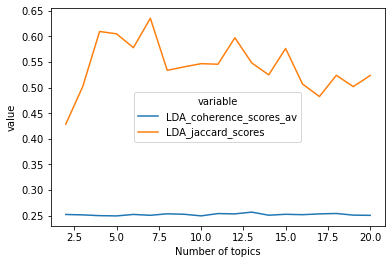

In [28]:
LDA = pd.DataFrame(list(zip(num_topics, LDA_coherence_scores_av, LDA_jaccard_scores)), 
                  columns = ['num_topics', 'LDA_coherence_scores_av', 'LDA_jaccard_scores'])
sns.lineplot(x = 'num_topics',
             y = 'value',
             hue = 'variable',
             data = pd.melt(LDA, ['num_topics']))
plt.xlabel('Number of topics')
plt.show()

In [34]:
LDA_topics

{0: [(0,
   '0.017*"student" + 0.011*"class" + 0.009*"time" + 0.007*"work" + 0.007*"course" + 0.005*"grade" + 0.005*"think" + 0.005*"also" + 0.005*"really" + 0.005*"year"'),
  (1,
   '0.016*"student" + 0.013*"class" + 0.007*"time" + 0.007*"think" + 0.007*"work" + 0.005*"thing" + 0.005*"also" + 0.005*"school" + 0.005*"question" + 0.004*"even"')],
 1: [(0,
   '0.018*"student" + 0.011*"class" + 0.008*"time" + 0.007*"think" + 0.006*"also" + 0.006*"work" + 0.006*"thing" + 0.005*"course" + 0.005*"really" + 0.005*"grade"'),
  (1,
   '0.013*"class" + 0.013*"student" + 0.008*"time" + 0.006*"think" + 0.006*"work" + 0.006*"course" + 0.005*"year" + 0.005*"want" + 0.005*"school" + 0.004*"thing"'),
  (2,
   '0.018*"student" + 0.013*"class" + 0.009*"time" + 0.008*"work" + 0.006*"course" + 0.005*"think" + 0.005*"even" + 0.005*"question" + 0.005*"good" + 0.004*"grade"')],
 2: [(0,
   '0.017*"student" + 0.011*"class" + 0.009*"time" + 0.006*"think" + 0.006*"work" + 0.006*"grade" + 0.006*"course" + 0.005*

In [31]:
LDA_coherence_scores

{0: [0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406,
  0.25215413082678406],
 1: [0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288,
  0.2513854285455288],
 2: [0.2498870739045107,
  0.2498870739045107,
  0.2498870739045107,
  0.2498870739045107,
  0.2498870739045107,
  0.2498870739045107,
  0.2498870739045107,
  0.2498870739045107,
  0

In [32]:
LDA_coherence_scores_av

[0.25215413082678406,
 0.2513854285455288,
 0.24988707390451065,
 0.24936103298731385,
 0.2522419732865291,
 0.2505852680462527,
 0.25348122010296625,
 0.2525803273361472,
 0.24944838823417262,
 0.2539452206523378,
 0.25332761648430796,
 0.2567711343873501,
 0.2507304263694587,
 0.2525556049288269,
 0.2517612019586198,
 0.2533345075378152,
 0.2541172446339864,
 0.250906249824527,
 0.2504770372468733]

In [36]:
LDA_jaccard_scores

[0.42857142857142855,
 0.5018315018315018,
 0.6095016095016094,
 0.6048951048951048,
 0.5778665778665779,
 0.635348778205921,
 0.5336211407639978,
 0.5403947903947905,
 0.5466607466607466,
 0.5455695819332184,
 0.597210869938143,
 0.5480160864776252,
 0.5248195028414812,
 0.576331604903034,
 0.5069208569208578,
 0.48249544573074027,
 0.5239390239390239,
 0.5018144623407785,
 0.5235409327514591]

## Topic model

To minimize Jaccard, I will choose the solution with 17 topics.

In [61]:
lda_model = LDA_models[15]

In [60]:
lda_coherence = LDA_coherence_scores_av[15]
lda_coherence

0.2533345075378152

In [59]:
lda_jaccard = LDA_jaccard_scores[15]
lda_jaccard

0.48249544573074027

In [62]:
lda_topics = lda_model.print_topics()
lda_topics

[(0,
  '0.018*"student" + 0.010*"class" + 0.007*"also" + 0.007*"think" + 0.007*"work" + 0.007*"course" + 0.006*"even" + 0.006*"time" + 0.005*"grade" + 0.005*"teaching"'),
 (1,
  '0.014*"student" + 0.009*"work" + 0.009*"time" + 0.008*"class" + 0.006*"think" + 0.006*"year" + 0.005*"also" + 0.005*"thing" + 0.005*"even" + 0.005*"want"'),
 (2,
  '0.011*"student" + 0.011*"class" + 0.009*"time" + 0.006*"school" + 0.006*"think" + 0.006*"course" + 0.006*"grade" + 0.006*"even" + 0.005*"email" + 0.005*"job"'),
 (3,
  '0.011*"student" + 0.011*"class" + 0.009*"time" + 0.007*"work" + 0.006*"think" + 0.006*"course" + 0.005*"also" + 0.005*"point" + 0.005*"school" + 0.004*"really"'),
 (4,
  '0.020*"student" + 0.011*"class" + 0.008*"time" + 0.007*"think" + 0.005*"also" + 0.005*"even" + 0.005*"work" + 0.005*"really" + 0.005*"way" + 0.005*"well"'),
 (5,
  '0.018*"student" + 0.015*"class" + 0.009*"work" + 0.008*"time" + 0.007*"assignment" + 0.006*"thing" + 0.005*"even" + 0.005*"email" + 0.005*"think" + 0.0

There is a good deal of overlap in words, resulting in topics that are difficult to interpret. This is likely not the best topic model for this data set.

# NMF

## Figuring out the optimal number of topics

In [44]:
num_topics = list(np.arange(2, 10 + 1, 1)) #TODO: change to 20

In [45]:
NMF_models = {}
for num in range(0, len(num_topics)):
    NMF_models[num] = Nmf(
      corpus=corpus,
      num_topics=num+2,
      id2word=id2word,
      chunksize=2000,
      passes=5,
      kappa=.1,
      minimum_probability=0.01,
      w_max_iter=300,
      w_stop_condition=0.0001,
      h_max_iter=100,
      h_stop_condition=0.001,
      eval_every=10,
      normalize=True
  )

In [46]:
NMF_topics = {}
for num in range(0, len(num_topics)):
    NMF_topics[num] = NMF_models[num].print_topics()

In [51]:
NMF_coherence_scores = {}
for num in range(0, len(num_topics)):
    NMF_coherence_scores[num] = [CoherenceModel(model=NMF_models[num],
                         texts=data_words,
                         dictionary=id2word,
                         coherence='c_v').get_coherence()\
                for i in num_topics[:-1]]
    
Audio("http://www.nch.com.au/acm/8k16bitpcm.wav", autoplay = True) #telle me when the code is done. 2.5h for 2-10

In [52]:
NMF_coherence_scores_av = [np.array(list).mean() for list in [scores for scores in NMF_coherence_scores.values()]]

In [47]:
NMF_jaccard_scores = []
for i in [*range(0,len(num_topics))]:
  jaccards = []
  for j in list(combinations([*range(0,len(NMF_topics[i]))],2)):
    t1 = NMF_topics[i][j[0]]
    t2 = NMF_topics[i][j[1]]
    jaccards.append(jaccard_similarity(set(re.sub("[^A-Za-z ]", "", t1[1]).split("  ")), set(re.sub("[^A-Za-z ]", "", t2[1]).split("  "))))
    mean = sum(jaccards)/len(jaccards)
  NMF_jaccard_scores.append(mean)

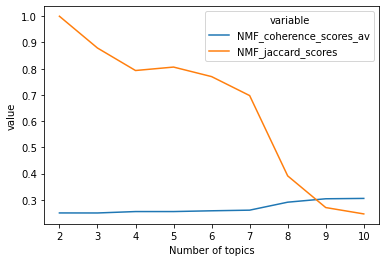

In [53]:
NMF = pd.DataFrame(list(zip(num_topics, NMF_coherence_scores_av, NMF_jaccard_scores)), 
                  columns = ['num_topics', 'NMF_coherence_scores_av', 'NMF_jaccard_scores'])
sns.lineplot(x = 'num_topics',
             y = 'value',
             hue = 'variable',
             data = pd.melt(NMF, ['num_topics']))
plt.xlabel('Number of topics')
plt.show()

In [50]:
NMF_topics

{0: [(0,
   '0.019*"student" + 0.013*"class" + 0.008*"time" + 0.007*"work" + 0.006*"think" + 0.006*"course" + 0.005*"also" + 0.005*"thing" + 0.005*"school" + 0.005*"even"'),
  (1,
   '0.019*"student" + 0.013*"class" + 0.008*"time" + 0.007*"work" + 0.006*"think" + 0.006*"course" + 0.005*"also" + 0.005*"thing" + 0.005*"school" + 0.005*"even"')],
 1: [(0,
   '0.019*"student" + 0.013*"class" + 0.008*"time" + 0.007*"work" + 0.006*"think" + 0.006*"course" + 0.005*"also" + 0.005*"thing" + 0.005*"school" + 0.005*"even"'),
  (1,
   '0.019*"student" + 0.013*"class" + 0.009*"time" + 0.007*"work" + 0.006*"think" + 0.006*"course" + 0.005*"also" + 0.005*"thing" + 0.005*"grade" + 0.005*"school"'),
  (2,
   '0.019*"student" + 0.013*"class" + 0.008*"time" + 0.007*"work" + 0.006*"think" + 0.006*"course" + 0.005*"also" + 0.005*"thing" + 0.005*"school" + 0.005*"even"')],
 2: [(0,
   '0.023*"student" + 0.015*"class" + 0.008*"time" + 0.007*"work" + 0.007*"course" + 0.006*"think" + 0.005*"grade" + 0.005*"als

In [54]:
NMF_coherence_scores

{0: [0.24953603677116587,
  0.24953603677116587,
  0.24953603677116587,
  0.24953603677116587,
  0.24953603677116587,
  0.24953603677116587,
  0.24953603677116587,
  0.24953603677116587],
 1: [0.24940674517408368,
  0.24940674517408368,
  0.24940674517408368,
  0.24940674517408368,
  0.24940674517408368,
  0.24940674517408368,
  0.24940674517408368,
  0.24940674517408368],
 2: [0.2547850516007826,
  0.2547850516007826,
  0.2547850516007826,
  0.2547850516007826,
  0.2547850516007826,
  0.2547850516007826,
  0.2547850516007826,
  0.2547850516007826],
 3: [0.25479290283548994,
  0.25479290283548994,
  0.25479290283548994,
  0.25479290283548994,
  0.25479290283548994,
  0.25479290283548994,
  0.25479290283548994,
  0.25479290283548994],
 4: [0.2577396851204797,
  0.2577396851204797,
  0.2577396851204797,
  0.2577396851204797,
  0.2577396851204797,
  0.2577396851204797,
  0.2577396851204797,
  0.2577396851204797],
 5: [0.26012975183865994,
  0.26012975183865994,
  0.26012975183865994,
  0.

In [55]:
NMF_coherence_scores_av

[0.24953603677116587,
 0.24940674517408368,
 0.2547850516007826,
 0.25479290283548994,
 0.2577396851204797,
 0.26012975183865994,
 0.29056028311724164,
 0.3035694440484057,
 0.304958502990723]

In [56]:
NMF_jaccard_scores

[1.0,
 0.8787878787878789,
 0.7929292929292929,
 0.806060606060606,
 0.7696969696969697,
 0.697286840143983,
 0.3909095689557875,
 0.27006829122412196,
 0.2458032965772903]

Note: I was getting better results with the other package, because of the way it incorporates stop words. However, there was no function to calculate coherence in scikit-learn. Solution from here https://stackoverflow.com/questions/59711928/how-can-i-calculate-the-coherence-score-in-the-sklearn-implementation-of-nmf

In [165]:
kmin, kmax = 2, 10

topic_models = []
# try each value of k
for k in range(kmin,kmax+1):
    print("Applying NMF for k=%d ..." % k )
    # run NMF
    model = NMF( init="nndsvd", n_components=k ) 
    W = model.fit_transform(data_vectorized)
    H = model.components_    
    # store for later
    topic_models.append( (k,W,H) )

Applying NMF for k=2 ...
Applying NMF for k=3 ...
Applying NMF for k=4 ...
Applying NMF for k=5 ...
Applying NMF for k=6 ...
Applying NMF for k=7 ...
Applying NMF for k=8 ...
Applying NMF for k=9 ...
Applying NMF for k=10 ...


In [166]:
class TokenGenerator:
    def __init__( self, documents, stopwords ):
        self.documents = documents
        self.stopwords = stopwords
        self.tokenizer = re.compile( r"(?u)\b\w\w+\b" )

    def __iter__( self ):
        print("Building Word2Vec model ...")
        for doc in self.documents:
            tokens = []
            for tok in self.tokenizer.findall( doc ):
                if tok.lower() in self.stopwords:
                    tokens.append( "<stopword>" )
                elif len(tok) >= 2:
                    tokens.append( tok.lower() )
            yield tokens

In [155]:
docgen = TokenGenerator(posts_clean.lemmatized_text.fillna(' '), stop_words_agg)

In [75]:
doc_topic = other_nmf_model.fit_transform(data_vectorized)

C:\Anaconda\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


In [156]:
w2v_model = gensim.models.Word2Vec(docgen, vector_size=500, min_count=20, sg=1)

Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...
Building Word2Vec model ...


In [163]:
def calculate_coherence( w2v_model, term_rankings ):
    overall_coherence = 0.0
    for topic_index in range(len(term_rankings)):
        # check each pair of terms
        pair_scores = []
        for pair in combinations( term_rankings[topic_index], 2 ):
            #print(str(pair[0]) + " " + str(pair[1]))
            pair_scores.append( w2v_model.wv.similarity(pair[0], pair[1]))
        # get the mean for all pairs in this topic
        topic_score = sum(pair_scores) / len(pair_scores)
        overall_coherence += topic_score
    # get the mean score across all topics
    return overall_coherence / len(term_rankings)

In [158]:
def get_descriptor( all_terms, H, topic_index, top ):
    # reverse sort the values to sort the indices
    top_indices = np.argsort( H[topic_index,:] )[::-1]
    # now get the terms corresponding to the top-ranked indices
    top_terms = []
    for term_index in top_indices[0:top]:
        top_terms.append( all_terms[term_index] )
    return top_terms

In [167]:
k_values = []
coherences = []
for (k,W,H) in topic_models:
    # Get all of the topic descriptors - the term_rankings, based on top 10 terms
    term_rankings = []
    for topic_index in range(k):
        term_rankings.append( get_descriptor( data_vectorized.columns, H, topic_index, 10 ) )
    # Now calculate the coherence based on our Word2vec model
    k_values.append( k )
    coherences.append( calculate_coherence( w2v_model, term_rankings ) )
    print("K=%02d: Coherence=%.4f" % ( k, coherences[-1] ) )

K=02: Coherence=0.2964
K=03: Coherence=0.2977
K=04: Coherence=0.2935
K=05: Coherence=0.2956
K=06: Coherence=0.3009
K=07: Coherence=0.2895
K=08: Coherence=0.2936
K=09: Coherence=0.2841
K=10: Coherence=0.2842


TODO: figure out a way to calc jaccard on the scikitlearn NMF model. NOTE: coherence only takes minutes in this implementation. Unsure why.

## Topic model

The coherence and jaccard are intersecting closest to the model with nine topics, so I will select that model.

In [63]:
nmf_model = NMF_models[7]

In [ ]:
nmf_coherence = NMF_coherence_scores_av[7]
nmf_coherence

In [ ]:
nmf_jaccard = NMF_jaccard_scores[7]
nmf_jaccard

In [64]:
nmf_topics = nmf_model.print_topics()
nmf_topics

[(0,
  '0.021*"grade" + 0.020*"student" + 0.019*"class" + 0.015*"time" + 0.015*"assignment" + 0.014*"work" + 0.011*"exam" + 0.010*"week" + 0.009*"semester" + 0.009*"email"'),
 (1,
  '0.030*"student" + 0.028*"class" + 0.011*"grade" + 0.009*"course" + 0.007*"time" + 0.007*"think" + 0.006*"point" + 0.006*"assignment" + 0.006*"thing" + 0.006*"email"'),
 (2,
  '0.053*"student" + 0.043*"class" + 0.018*"course" + 0.017*"grade" + 0.012*"exam" + 0.009*"question" + 0.007*"math" + 0.007*"semester" + 0.007*"point" + 0.006*"test"'),
 (3,
  '0.031*"student" + 0.014*"class" + 0.008*"think" + 0.008*"school" + 0.006*"course" + 0.005*"even" + 0.005*"also" + 0.005*"use" + 0.005*"way" + 0.005*"thing"'),
 (4,
  '0.011*"time" + 0.010*"work" + 0.008*"year" + 0.008*"student" + 0.007*"school" + 0.007*"job" + 0.006*"think" + 0.006*"course" + 0.006*"teaching" + 0.005*"faculty"'),
 (5,
  '0.036*"student" + 0.023*"class" + 0.013*"work" + 0.009*"assignment" + 0.009*"time" + 0.009*"course" + 0.007*"think" + 0.006*"s

Returning to scikit learn NMF for better results:

In [14]:
other_nmf_model = NMF(init="nndsvd", n_components=9)

In [15]:
def display_topics(model, feature_names, num_top_words, topic_names = None):
    for ix, topic in enumerate(model.components_):
        if not topic_names or not topic_names[ix]:
            print("\nTopic", ix)
        else:
            print("\nTopic: '", topic_names[ix], "'")
        print(",".join([feature_names[i] \
            for i in topic.argsort()[:-num_top_words - 1:-1]]))

display_topics(other_nmf_model, vectorizer.get_feature_names(), 15)

AttributeError: 'NMF' object has no attribute 'components_'

TODO: figure out why it thinks NMF has no attribute components_. Restarting kernel did not solve.

# BTM

## Figuring out the optimal number of topics

In [ ]:
texts = posts_clean['full_text'].str.strip().tolist()

In [ ]:
X, vocabulary, vocab_dict = btm.get_words_freqs(texts)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
tf = np.array(X.sum(axis=0)).ravel()

In [ ]:
docs_vec = btm.get_vectorized_docs(texts, vocabulary)

In [ ]:
docs_lens = list(map(len, docs_vec))

PROBLEM: the following code uses too much RAM, even when I run it on less than a third of my entire dataset:

In [ ]:
biterms = btm.get_biterms(docs_vec)

In [ ]:
model = btm.BTM(
    X, vocabulary, seed=12321, T=8, M=20, alpha=50/8, beta=0.01)
model.fit(biterms, iterations=20)
p_zd = model.transform(docs_vec)

In [ ]:
perplexity = btm.perplexity(model.matrix_topics_words_, p_zd, X, 8)
coherence = btm.coherence(model.matrix_topics_words_, X, M=20)
# or
perplexity = model.perplexity_
coherence = model.coherence_

## Topic model

In [ ]:
btm_model = 

# Comparing LDA, NMF, and BTM

TODO: calc perplexity for optimal LDA solution, optimal NMF solution, and optimal BTM solution

TODO: table comparing coherence, Jaccard, and perplexity for the optimal LDA solution, optimal NMF solution, and optimal BTM solution.

# Final Model

For demonstration purposes, the nmf model that currently makes the most sense:

In [72]:
model = other_nmf_model

In [76]:
topics_data = pd.concat([posts_clean, pd.DataFrame(doc_topic)], axis=1)
topics_data

created                                          full_text  \
0      1.622534e+09  i just created a new course now we are one of ...   
1      1.622532e+09  the native scholar who wasn t more than a deca...   
2      1.622523e+09  accidental poetry extension request i had an i...   
3      1.622522e+09  what percent of students do you think cheat na...   
4      1.622516e+09  i ve never seen the kinds of students you talk...   
...             ...                                                ...   
16454  1.527908e+09  fellow profs what are your best coping strateg...   
16455  1.527891e+09  advice for keeping up motivation does anyone h...   
16456  1.527885e+09  which nsf grant to apply for about to start a ...   
16457  1.527877e+09  advice for starting a writing group i ll be sp...   
16458  1.527859e+09         karl kjer award winning professor removed    

                                              lemmatized  \
0      [created, new, course, social, work, program, ...   
1      [native, scholar, decade, ago, prominent, acad...   
2      [accidental, poetry, extension, request, issue...   
3      [percent, student, think, cheat, equated, le, ...   
4      [never, seen, kind, student, talk, whiny, argu...   
...                                                  ...   
16454  [fellow, prof, best, coping, strategy, occasio...   
16455  [advice, keeping, motivation, anyone, advice, ...   
16456  [nsf, grant, start, tt, position, stem, smalli...   
16457  [advice, starting, writing, group, spending, n...   
16458              [karl, kjer, award, winning, removed]   

                                         lemmatized_text         0         1  \
0      created new course social work program offer d...  0.000000  0.032346   
1      native scholar decade ago prominent academic e...  0.011836  0.016825   
2      accidental poetry extension request issue edit...  0.003829  0.000000   
3      percent student think cheat equated le torture...  0.059929  0.000000   
4      never seen kind student talk whiny argue act i...  0.043730  0.000000   
...                                                  ...       ...       ...   
16454  fellow prof best coping strategy occasional la...  0.088406  0.019759   
16455  advice keeping motivation anyone advice motiva...  0.022152  0.037985   
16456  nsf grant start tt position stem smallish priv...  0.024845  0.068963   
16457  advice starting writing group spending next ac...  0.009988  0.029352   
16458                    karl kjer award winning removed  0.000000  0.000000   

              2         3         4         5         6         7         8  
0      0.013648  0.000000  0.000000  0.000000  0.009119  0.022863  0.008355  
1      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.021470  
2      0.000000  0.081862  0.053951  0.000000  0.015187  0.000000  0.032971  
3      0.004322  0.000000  0.000000  0.037028  0.000000  0.000000  0.023536  
4      0.000000  0.000000  0.000000  0.000000  0.003377  0.000000  0.000000  
...         ...       ...       ...       ...       ...       ...       ...  
16454  0.043727  0.000842  0.000000  0.003880  0.024063  0.001926  0.014672  
16455  0.025492  0.016735  0.024253  0.000000  0.004142  0.013251  0.024341  
16456  0.001993  0.000004  0.000000  0.001188  0.000000  0.000000  0.012997  
16457  0.007438  0.003241  0.011070  0.000000  0.000000  0.020499  0.067543  
16458  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  

[16459 rows x 13 columns]

In [88]:
topics_data['Max'] = topics_data.iloc[:, np.r_[4:13]].idxmax(axis=1)
topics_data.head(10)

created                                          full_text  \
0  1.622534e+09  i just created a new course now we are one of ...   
1  1.622532e+09  the native scholar who wasn t more than a deca...   
2  1.622523e+09  accidental poetry extension request i had an i...   
3  1.622522e+09  what percent of students do you think cheat na...   
4  1.622516e+09  i ve never seen the kinds of students you talk...   
5  1.622511e+09  i would honestly rather get raped or beaten up...   
6  1.622500e+09   older adults are heading to college in pursui...   
7  1.622496e+09  this is something you ve been missing from bei...   
8  1.622491e+09  is there any way to not have my ratemyprofesso...   
9  1.622486e+09  i just did a very strange thing i just graded ...   

                                          lemmatized  \
0  [created, new, course, social, work, program, ...   
1  [native, scholar, decade, ago, prominent, acad...   
2  [accidental, poetry, extension, request, issue...   
3  [percent, student, think, cheat, equated, le, ...   
4  [never, seen, kind, student, talk, whiny, argu...   
5  [honestly, rather, raped, beaten, rather, suff...   
6  [older, adult, heading, pursuit, new, opportun...   
7                       [something, missing, missed]   
8  [way, profile, show, google, search, name, giv...   
9  [strange, thing, graded, assignment, paper, ru...   

                                     lemmatized_text         0         1  \
0  created new course social work program offer d...  0.000000  0.032346   
1  native scholar decade ago prominent academic e...  0.011836  0.016825   
2  accidental poetry extension request issue edit...  0.003829  0.000000   
3  percent student think cheat equated le torture...  0.059929  0.000000   
4  never seen kind student talk whiny argue act i...  0.043730  0.000000   
5  honestly rather raped beaten rather suffer rem...  0.007363  0.000000   
6  older adult heading pursuit new opportunity si...  0.044731  0.037145   
7                           something missing missed  0.016883  0.000000   
8  way profile show google search name given cari...  0.049767  0.031130   
9  strange thing graded assignment paper rumor an...  0.023586  0.000000   

          2         3         4         5         6         7         8  Max  
0  0.013648  0.000000  0.000000  0.000000  0.009119  0.022863  0.008355    1  
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.021470    8  
2  0.000000  0.081862  0.053951  0.000000  0.015187  0.000000  0.032971    3  
3  0.004322  0.000000  0.000000  0.037028  0.000000  0.000000  0.023536    0  
4  0.000000  0.000000  0.000000  0.000000  0.003377  0.000000  0.000000    0  
5  0.000000  0.000000  0.000000  0.000639  0.000000  0.000000  0.001396    0  
6  0.028214  0.000000  0.000000  0.003077  0.013242  0.035125  0.012272    0  
7  0.000000  0.000768  0.000000  0.000000  0.000000  0.000000  0.003224    0  
8  0.004238  0.000000  0.016023  0.000000  0.000000  0.011466  0.045812    0  
9  0.000000  0.019782  0.008588  0.007520  0.047975  0.000000  0.104970    8

In [145]:
topics_data['date'] =  pd.to_datetime(topics_data.created, unit='s').dt.round("d")
topics_data.head(10)

created                                          full_text  \
0  1.622534e+09  i just created a new course now we are one of ...   
1  1.622532e+09  the native scholar who wasn t more than a deca...   
2  1.622523e+09  accidental poetry extension request i had an i...   
3  1.622522e+09  what percent of students do you think cheat na...   
4  1.622516e+09  i ve never seen the kinds of students you talk...   
5  1.622511e+09  i would honestly rather get raped or beaten up...   
6  1.622500e+09   older adults are heading to college in pursui...   
7  1.622496e+09  this is something you ve been missing from bei...   
8  1.622491e+09  is there any way to not have my ratemyprofesso...   
9  1.622486e+09  i just did a very strange thing i just graded ...   

                                          lemmatized  \
0  [created, new, course, social, work, program, ...   
1  [native, scholar, decade, ago, prominent, acad...   
2  [accidental, poetry, extension, request, issue...   
3  [percent, student, think, cheat, equated, le, ...   
4  [never, seen, kind, student, talk, whiny, argu...   
5  [honestly, rather, raped, beaten, rather, suff...   
6  [older, adult, heading, pursuit, new, opportun...   
7                       [something, missing, missed]   
8  [way, profile, show, google, search, name, giv...   
9  [strange, thing, graded, assignment, paper, ru...   

                                     lemmatized_text         0         1  \
0  created new course social work program offer d...  0.000000  0.032346   
1  native scholar decade ago prominent academic e...  0.011836  0.016825   
2  accidental poetry extension request issue edit...  0.003829  0.000000   
3  percent student think cheat equated le torture...  0.059929  0.000000   
4  never seen kind student talk whiny argue act i...  0.043730  0.000000   
5  honestly rather raped beaten rather suffer rem...  0.007363  0.000000   
6  older adult heading pursuit new opportunity si...  0.044731  0.037145   
7                           something missing missed  0.016883  0.000000   
8  way profile show google search name given cari...  0.049767  0.031130   
9  strange thing graded assignment paper rumor an...  0.023586  0.000000   

          2         3         4         5         6         7         8  Max  \
0  0.013648  0.000000  0.000000  0.000000  0.009119  0.022863  0.008355    1   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.021470    8   
2  0.000000  0.081862  0.053951  0.000000  0.015187  0.000000  0.032971    3   
3  0.004322  0.000000  0.000000  0.037028  0.000000  0.000000  0.023536    0   
4  0.000000  0.000000  0.000000  0.000000  0.003377  0.000000  0.000000    0   
5  0.000000  0.000000  0.000000  0.000639  0.000000  0.000000  0.001396    0   
6  0.028214  0.000000  0.000000  0.003077  0.013242  0.035125  0.012272    0   
7  0.000000  0.000768  0.000000  0.000000  0.000000  0.000000  0.003224    0   
8  0.004238  0.000000  0.016023  0.000000  0.000000  0.011466  0.045812    0   
9  0.000000  0.019782  0.008588  0.007520  0.047975  0.000000  0.104970    8   

        date  
0 2021-06-01  
1 2021-06-01  
2 2021-06-01  
3 2021-06-01  
4 2021-06-01  
5 2021-06-01  
6 2021-06-01  
7 2021-06-01  
8 2021-06-01  
9 2021-06-01

In [131]:
topics_data.to_csv('topics_data.csv')

In [132]:
grouped_dates_topics = topics_data.groupby(['date', 'Max'], as_index=False).count()
grouped_dates_topics.head(10)

date  Max  created  full_text  lemmatized  lemmatized_text  0  1  2  \
0 2018-06-02    0        2          2           2                2  2  2  2   
1 2018-06-02    1        2          2           2                2  2  2  2   
2 2018-06-02    6        1          1           1                1  1  1  1   
3 2018-06-02    8        1          1           1                1  1  1  1   
4 2018-06-03    0        2          2           2                2  2  2  2   
5 2018-06-03    1        2          2           2                2  2  2  2   
6 2018-06-04    0        1          1           1                1  1  1  1   
7 2018-06-05    1        2          2           2                2  2  2  2   
8 2018-06-05    2        1          1           1                1  1  1  1   
9 2018-06-05    6        1          1           1                1  1  1  1   

   3  4  5  6  7  8  
0  2  2  2  2  2  2  
1  2  2  2  2  2  2  
2  1  1  1  1  1  1  
3  1  1  1  1  1  1  
4  2  2  2  2  2  2  
5  2  2  2  2  2  2  
6  1  1  1  1  1  1  
7  2  2  2  2  2  2  
8  1  1  1  1  1  1  
9  1  1  1  1  1  1

No handles with labels found to put in legend.


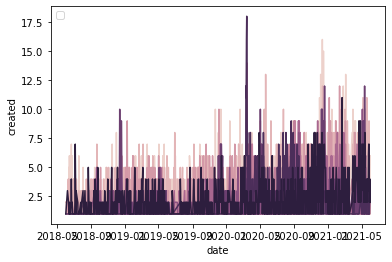

In [141]:
#TODO: switch to plotnine

sns.lineplot( x="date", y="created", data=grouped_dates_topics, hue='Max', legend=False)
 
plt.legend(loc='upper left')

plt.show()